In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
from datetime import timezone 
from pprint import pprint
import time
import re
from matplotlib import pyplot as plt

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(),wait_on_rate_limit=True)

In [3]:

fox_reply_twitter = pd.read_csv("Resource/Reply_Twitter_Fox.csv")
fox_reply_twitter = fox_reply_twitter.drop(["Unnamed: 0"],axis=1)
fox_reply_twitter.head()

,News Account,News id,Reply Text,Reply Created Date,Reply Tweet id,Reply User id,Reply Compound,Reply Positive,Reply Neutral,Reply Negative,Reply Tweets Ago
0,@FoxNews,985673747976937477,@FoxNews American People,Mon Apr 16 00:22:15 +0000 2018,9.856747e+17,2.447430e+09,0.0000,0.0,1.000,0.000,1.0
1,@FoxNews,985673747976937477,@FoxNews they are never going to move on to Tr...,Mon Apr 16 00:22:10 +0000 2018,9.856747e+17,3.056972e+08,-0.7184,0.0,0.714,0.286,2.0
2,@FoxNews,985673747976937477,@FoxNews,Mon Apr 16 00:22:08 +0000 2018,9.856747e+17,9.857685e+08,0.0000,0.0,1.000,0.000,3.0
3,@FoxNews,985673747976937477,"@FoxNews the tone, content and manipulative fe...",Mon Apr 16 00:21:58 +0000 2018,9.856746e+17,7.769249e+17,-0.8795,0.0,0.729,0.271,4.0
4,@FoxNews,985673747976937477,@FoxNews Do you ever stop sucking Trump's dick,Mon Apr 16 00:21:47 +0000 2018,9.856746e+17,9.705323e+17,-0.6705,0.0,0.522,0.478,5.0


In [4]:
fox_reply_twitter_compound = fox_reply_twitter.groupby(['News id'])['Reply Compound'].mean()
fox_reply_twitter_positive = fox_reply_twitter.groupby(['News id'])['Reply Positive'].mean()
fox_reply_twitter_neutral = fox_reply_twitter.groupby(['News id'])['Reply Neutral'].mean()
fox_reply_twitter_negative = fox_reply_twitter.groupby(['News id'])['Reply Negative'].mean()
fox_reply_sentiment = pd.DataFrame({"Reply Compound": fox_reply_twitter_compound,
                                    "Reply Positive": fox_reply_twitter_positive,
                                    "Reply Neutral": fox_reply_twitter_neutral,
                                    "Reply Negative": fox_reply_twitter_negative,
    
                                    })
fox_reply_sentiment = fox_reply_sentiment.reset_index()
fox_reply_sentiment.head()

,News id,Reply Compound,Reply Negative,Reply Neutral,Reply Positive
0,983998201928830978,0.509633,0.000000,0.722000,0.278000
1,983999928774090752,0.359100,0.000000,0.787667,0.212333
2,984000938913554438,0.461567,0.059667,0.681333,0.259000
3,984002635576594434,0.082500,0.070500,0.778750,0.151000
4,984004115951947776,0.493900,0.000000,0.842000,0.158000


In [5]:
fox_news_twitter = pd.read_csv("Resource/News_Twitter Fox.csv")
fox_news_twitter = fox_news_twitter.drop(["Unnamed: 0"],axis=1)
fox_news_twitter.head()

,News Account,Screen Name,News Text,News Created Date,News id,News Account id,Retweet Count,Like Count,Followers Count,News Compound,News Positive,News Neutral,News Negative,News Tweets Ago,News Created Date Simplified
0,@FoxNews,FoxNews,OPINION: The US attack on Syria is completely ...,Mon Apr 16 00:18:29 +0000 2018,985673747976937477,1367531,85,246,17700748,-0.5434,0.074,0.706,0.220,1,Apr 16
1,@FoxNews,FoxNews,".@RepGoodlatte: ""I still think we need a speci...",Mon Apr 16 00:15:15 +0000 2018,985672934378307585,1367531,71,177,17700748,0.4019,0.072,0.928,0.000,2,Apr 16
2,@FoxNews,FoxNews,".@JudgeJeanine: ""Why would you believe a guy w...",Mon Apr 16 00:07:04 +0000 2018,985670876539564033,1367531,100,299,17700748,-0.6249,0.119,0.657,0.224,3,Apr 16
3,@FoxNews,FoxNews,Conservative Activist Disinvited from Student-...,Sun Apr 15 23:54:42 +0000 2018,985667763258757123,1367531,172,268,17700748,0.0000,0.000,1.000,0.000,4,Apr 15
4,@FoxNews,FoxNews,'They Don't Want Black Folks Voting': @JoeBide...,Sun Apr 15 23:48:49 +0000 2018,985666283436953601,1367531,73,182,17700748,-0.0572,0.000,0.929,0.071,5,Apr 15


In [6]:
fox_twitter_news_reply_sentiment = fox_news_twitter.merge(fox_reply_sentiment,on='News id',how='inner')
fox_twitter_news_reply_sentiment.head()

,News Account,Screen Name,News Text,News Created Date,News id,News Account id,Retweet Count,Like Count,Followers Count,News Compound,News Positive,News Neutral,News Negative,News Tweets Ago,News Created Date Simplified,Reply Compound,Reply Negative,Reply Neutral,Reply Positive
0,@FoxNews,FoxNews,OPINION: The US attack on Syria is completely ...,Mon Apr 16 00:18:29 +0000 2018,985673747976937477,1367531,85,246,17700748,-0.5434,0.074,0.706,0.220,1,Apr 16,-0.423983,0.187167,0.812833,0.000000
1,@FoxNews,FoxNews,".@RepGoodlatte: ""I still think we need a speci...",Mon Apr 16 00:15:15 +0000 2018,985672934378307585,1367531,71,177,17700748,0.4019,0.072,0.928,0.000,2,Apr 16,-0.006329,0.095000,0.810000,0.095000
2,@FoxNews,FoxNews,".@JudgeJeanine: ""Why would you believe a guy w...",Mon Apr 16 00:07:04 +0000 2018,985670876539564033,1367531,100,299,17700748,-0.6249,0.119,0.657,0.224,3,Apr 16,-0.013463,0.076684,0.864053,0.059211
3,@FoxNews,FoxNews,Conservative Activist Disinvited from Student-...,Sun Apr 15 23:54:42 +0000 2018,985667763258757123,1367531,172,268,17700748,0.0000,0.000,1.000,0.000,4,Apr 15,-0.161071,0.077571,0.884143,0.038286
4,@FoxNews,FoxNews,'They Don't Want Black Folks Voting': @JoeBide...,Sun Apr 15 23:48:49 +0000 2018,985666283436953601,1367531,73,182,17700748,-0.0572,0.000,0.929,0.071,5,Apr 15,-0.274171,0.190412,0.733706,0.075824


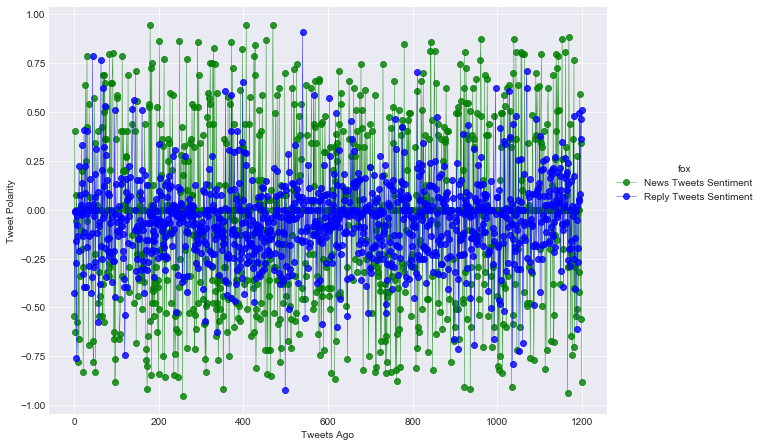

In [7]:
plt.figure(figsize=(10,7.5))
plt.style.use('seaborn-darkgrid')
x_val = fox_twitter_news_reply_sentiment["News Tweets Ago"]
y_news = fox_twitter_news_reply_sentiment["News Compound"]
y_reply = fox_twitter_news_reply_sentiment["Reply Compound"]
plt.plot(x_val, y_news, marker="o", linewidth=0.5,
                 alpha=0.8, color="g", label='News Tweets Sentiment')
plt.plot(x_val, y_reply, marker="o", linewidth=0.5,
                 alpha=0.8, color="b", label='Reply Tweets Sentiment')
lgd = plt.legend(title="fox",loc='lower left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig(f"Result/fox_twitter_news_reply_sentiment.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [8]:
fox_youtube = pd.read_csv("Resource/Fox_News_data.csv")
fox_youtube = fox_youtube.rename(columns = {"Unnamed: 0": "Video Ago"})
fox_youtube.head()

,Video Ago,Channel Name,Comment Count,Comment Date,Comment Text,Comment Time,Compound Score,Dislike Count,Favorite Count,Likes Count,Negative Score,Neutral Score,Positive Score,Video Date,Video ID,Video Time,Video Title,Views Count
0,0,FoxNewsChannel,10156,2018-04-15,Mark Zuckerberg is not from Earth . from a pla...,09:36:07,0.0000,26,0,452,0.000,1.000,0.000,2018-04-15,nRxh_Lt_Kxw,03:37:51,Gutfeld: It was tough watching Zuck explain th...,10156
1,1,FoxNewsChannel,10156,2018-04-15,This kid must be fun at parties.,09:35:07,0.7184,26,0,452,0.000,0.455,0.545,2018-04-15,nRxh_Lt_Kxw,03:37:51,Gutfeld: It was tough watching Zuck explain th...,10156
2,2,FoxNewsChannel,10156,2018-04-15,Anybody notice that Zuck looks like Petey from...,09:28:55,0.3612,26,0,452,0.000,0.800,0.200,2018-04-15,nRxh_Lt_Kxw,03:37:51,Gutfeld: It was tough watching Zuck explain th...,10156
3,3,FoxNewsChannel,10156,2018-04-15,He looks like an alien..trans humanist,09:12:52,0.3612,26,0,452,0.000,0.667,0.333,2018-04-15,nRxh_Lt_Kxw,03:37:51,Gutfeld: It was tough watching Zuck explain th...,10156
4,4,FoxNewsChannel,10156,2018-04-15,*I remember when I was young ... we used to si...,08:50:46,0.6615,26,0,452,0.031,0.874,0.095,2018-04-15,nRxh_Lt_Kxw,03:37:51,Gutfeld: It was tough watching Zuck explain th...,10156


In [9]:
fox_youtube_compound = fox_youtube.groupby(['Video Title'])['Compound Score'].mean()
fox_youtube_negative = fox_youtube.groupby(['Video Title'])['Negative Score'].mean()
fox_youtube_neutral = fox_youtube.groupby(['Video Title'])['Neutral Score'].mean()
fox_youtube_positive = fox_youtube.groupby(['Video Title'])['Positive Score'].mean()
fox_youtube_sentiment = pd.DataFrame({"Reply Compound": fox_youtube_compound,
                                    "Reply Positive": fox_youtube_positive,
                                    "Reply Neutral": fox_youtube_neutral,
                                    "Reply Negative": fox_youtube_negative,
    
                                    })
fox_youtube_sentiment = fox_youtube_sentiment.reset_index()
fox_youtube_sentiment.head()

,Video Title,Reply Compound,Reply Negative,Reply Neutral,Reply Positive
0,'Angel mom' reacts after Trump says DACA is dead,-0.227403,0.158350,0.745970,0.095680
1,'Campus Craziness': Duke's safe space for toxi...,-0.184089,0.175833,0.714963,0.109185
2,'End of modern life' in Puerto Rico after Hurr...,-0.099360,0.112120,0.795090,0.082740
3,'Fox & Friends' town hall on gun control,-0.357245,0.190190,0.736100,0.073730
4,'Fox & Friends' town hall on guns and safety i...,-0.212598,0.138420,0.760710,0.100910


In [10]:
title_sentiment = []
for index, row in fox_youtube_sentiment.iterrows():
    results = analyzer.polarity_scores(row["Video Title"])    
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
    title_sentiment.append({"Video Title": row["Video Title"],
                           "Title Compound": compound,
                           "Title Positive": pos,
                           "Title Neutral": neu,
                           "Title Negative": neg})
title_sentiment_pd = pd.DataFrame.from_dict(title_sentiment)
title_sentiment_pd = title_sentiment_pd[["Video Title",
                           "Title Compound",
                           "Title Positive",
                           "Title Neutral",
                           "Title Negative"]]
title_sentiment_pd.head()


,Video Title,Title Compound,Title Positive,Title Neutral,Title Negative
0,'Angel mom' reacts after Trump says DACA is dead,-0.6486,0.000,0.650,0.350
1,'Campus Craziness': Duke's safe space for toxi...,0.4404,0.293,0.707,0.000
2,'End of modern life' in Puerto Rico after Hurr...,0.0000,0.000,1.000,0.000
3,'Fox & Friends' town hall on gun control,0.1779,0.295,0.476,0.229
4,'Fox & Friends' town hall on guns and safety i...,0.7096,0.424,0.576,0.000


In [11]:
fox_youtube_news_reply_sentiment = fox_youtube_sentiment.merge(title_sentiment_pd,on='Video Title',how='inner')
fox_youtube_news_reply_sentiment.head()

,Video Title,Reply Compound,Reply Negative,Reply Neutral,Reply Positive,Title Compound,Title Positive,Title Neutral,Title Negative
0,'Angel mom' reacts after Trump says DACA is dead,-0.227403,0.158350,0.745970,0.095680,-0.6486,0.000,0.650,0.350
1,'Campus Craziness': Duke's safe space for toxi...,-0.184089,0.175833,0.714963,0.109185,0.4404,0.293,0.707,0.000
2,'End of modern life' in Puerto Rico after Hurr...,-0.099360,0.112120,0.795090,0.082740,0.0000,0.000,1.000,0.000
3,'Fox & Friends' town hall on gun control,-0.357245,0.190190,0.736100,0.073730,0.1779,0.295,0.476,0.229
4,'Fox & Friends' town hall on guns and safety i...,-0.212598,0.138420,0.760710,0.100910,0.7096,0.424,0.576,0.000


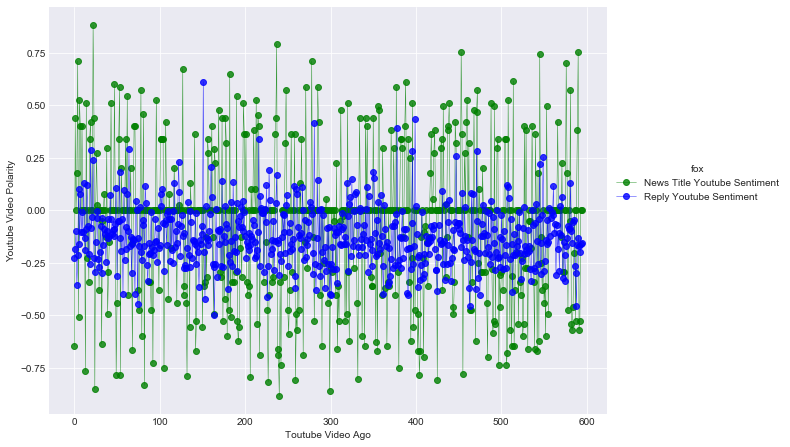

In [12]:
plt.figure(figsize=(10,7.5))
plt.style.use('seaborn-darkgrid')
x_val = np.arange(len(fox_youtube_news_reply_sentiment["Video Title"]))
y_news = fox_youtube_news_reply_sentiment["Title Compound"]
y_reply = fox_youtube_news_reply_sentiment["Reply Compound"]
plt.plot(x_val, y_news, marker="o", linewidth=0.5,
                 alpha=0.8, color="g", label='News Title Youtube Sentiment')
plt.plot(x_val, y_reply, marker="o", linewidth=0.5,
                 alpha=0.8, color="b", label='Reply Youtube Sentiment')
lgd = plt.legend(title="fox",loc='lower left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Youtube Video Polarity")
plt.xlabel("Toutube Video Ago")
plt.savefig(f"Result/fox_youtube_news_reply_sentiment.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [13]:
news_created_date_simplified = []
for date in fox_twitter_news_reply_sentiment['News Created Date'].values:
    news_created_date_simplified.append(date[4:10])  

In [14]:
fox_twitter_news_reply_sentiment['News Created Date'].values

array(['Mon Apr 16 00:18:29 +0000 2018', 'Mon Apr 16 00:15:15 +0000 2018',
       'Mon Apr 16 00:07:04 +0000 2018', ...,
       'Wed Apr 11 09:31:20 +0000 2018', 'Wed Apr 11 09:27:19 +0000 2018',
       'Wed Apr 11 09:20:27 +0000 2018'], dtype=object)

In [15]:
fox_twitter_news_reply_sentiment["News Created Date Simplified"] = pd.Series(news_created_date_simplified, index=fox_twitter_news_reply_sentiment.index)

In [16]:
fox_twitter_news_reply_sentiment

,News Account,Screen Name,News Text,News Created Date,News id,News Account id,Retweet Count,Like Count,Followers Count,News Compound,News Positive,News Neutral,News Negative,News Tweets Ago,News Created Date Simplified,Reply Compound,Reply Negative,Reply Neutral,Reply Positive
0,@FoxNews,FoxNews,OPINION: The US attack on Syria is completely ...,Mon Apr 16 00:18:29 +0000 2018,985673747976937477,1367531,85,246,17700748,-0.5434,0.074,0.706,0.220,1,Apr 16,-0.423983,0.187167,0.812833,0.000000
1,@FoxNews,FoxNews,".@RepGoodlatte: ""I still think we need a speci...",Mon Apr 16 00:15:15 +0000 2018,985672934378307585,1367531,71,177,17700748,0.4019,0.072,0.928,0.000,2,Apr 16,-0.006329,0.095000,0.810000,0.095000
2,@FoxNews,FoxNews,".@JudgeJeanine: ""Why would you believe a guy w...",Mon Apr 16 00:07:04 +0000 2018,985670876539564033,1367531,100,299,17700748,-0.6249,0.119,0.657,0.224,3,Apr 16,-0.013463,0.076684,0.864053,0.059211
3,@FoxNews,FoxNews,Conservative Activist Disinvited from Student-...,Sun Apr 15 23:54:42 +0000 2018,985667763258757123,1367531,172,268,17700748,0.0000,0.000,1.000,0.000,4,Apr 15,-0.161071,0.077571,0.884143,0.038286
4,@FoxNews,FoxNews,'They Don't Want Black Folks Voting': @JoeBide...,Sun Apr 15 23:48:49 +0000 2018,985666283436953601,1367531,73,182,17700748,-0.0572,0.000,0.929,0.071,5,Apr 15,-0.274171,0.190412,0.733706,0.075824
5,@FoxNews,FoxNews,Florida woman ordered to share custody of her ...,Sun Apr 15 23:33:08 +0000 2018,985662335405690880,1367531,54,111,17700748,0.0772,0.137,0.745,0.118,6,Apr 15,-0.757900,0.277000,0.723000,0.000000
6,@FoxNews,FoxNews,BREAKING: 'Full Metal Jacket' actor R. Lee Erm...,Sun Apr 15 23:19:47 +0000 2018,985658978427424768,1367531,1416,2426,17700748,0.0000,0.000,1.000,0.000,7,Apr 15,-0.033679,0.123357,0.788571,0.088000
7,@FoxNews,FoxNews,".@nikkihaley: ""@POTUS has made it very clear t...",Sun Apr 15 23:09:38 +0000 2018,985656423072911361,1367531,257,1022,17700748,-0.5729,0.155,0.578,0.268,8,Apr 15,-0.079027,0.103600,0.820867,0.075600
8,@FoxNews,FoxNews,"Flowers, tributes left for burglar stabbed to ...",Sun Apr 15 22:59:07 +0000 2018,985653776534122498,1367531,101,171,17700748,-0.7783,0.000,0.638,0.362,10,Apr 15,-0.132354,0.093923,0.875462,0.030538
9,@FoxNews,FoxNews,"Moments ago, @PressSec released a statement th...",Sun Apr 15 22:40:13 +0000 2018,985649019392229376,1367531,361,1612,17700748,0.0000,0.000,1.000,0.000,11,Apr 15,-0.210917,0.155833,0.827667,0.016333


In [17]:
fox_news_twitter_compound_by_date = fox_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['News Compound'].mean()
fox_news_twitter_positive_by_date = fox_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['News Positive'].mean()
fox_news_twitter_neutral_by_date = fox_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['News Neutral'].mean()
fox_news_twitter_negative_by_date = fox_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['News Negative'].mean()
fox_reply_twitter_compound_by_date = fox_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['Reply Compound'].mean()
fox_reply_twitter_positive_by_date = fox_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['Reply Positive'].mean()
fox_reply_twitter_neutral_by_date = fox_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['Reply Neutral'].mean()
fox_reply_twitter_negative_by_date = fox_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['Reply Negative'].mean()

fox_twitter_news_reply_sentiment_by_date = pd.DataFrame({
                                    "Tweet News Compound": fox_news_twitter_compound_by_date,
                                    "Tweet News Positive": fox_news_twitter_positive_by_date,
                                    "Tweet News Neutral": fox_news_twitter_neutral_by_date,
                                    "Tweet News Negative": fox_news_twitter_negative_by_date,
                                    "Tweet Reply Compound": fox_reply_twitter_compound_by_date,
                                    "Tweet Reply Positive": fox_reply_twitter_positive_by_date,
                                    "Tweet Reply Neutral": fox_reply_twitter_neutral_by_date,
                                    "Tweet Reply Negative": fox_reply_twitter_negative_by_date
    
                                    })
fox_twitter_news_reply_sentiment_by_date = fox_twitter_news_reply_sentiment_by_date.reset_index()
fox_twitter_news_reply_sentiment_by_date

,News Created Date Simplified,Tweet News Compound,Tweet News Negative,Tweet News Neutral,Tweet News Positive,Tweet Reply Compound,Tweet Reply Negative,Tweet Reply Neutral,Tweet Reply Positive
0,Apr 11,0.022360,0.077343,0.842793,0.079852,-0.005033,0.093958,0.813813,0.092239
1,Apr 12,-0.042224,0.094159,0.833769,0.072068,-0.062124,0.109259,0.800604,0.090140
2,Apr 13,-0.004102,0.082966,0.835871,0.081191,-0.038830,0.098043,0.809866,0.092100
3,Apr 14,-0.074705,0.106435,0.818636,0.074900,-0.091780,0.114267,0.801359,0.084371
4,Apr 15,-0.056221,0.096448,0.830280,0.073233,-0.052698,0.101653,0.806181,0.092159
5,Apr 16,-0.255467,0.148000,0.763667,0.088333,-0.147925,0.119617,0.828962,0.051404


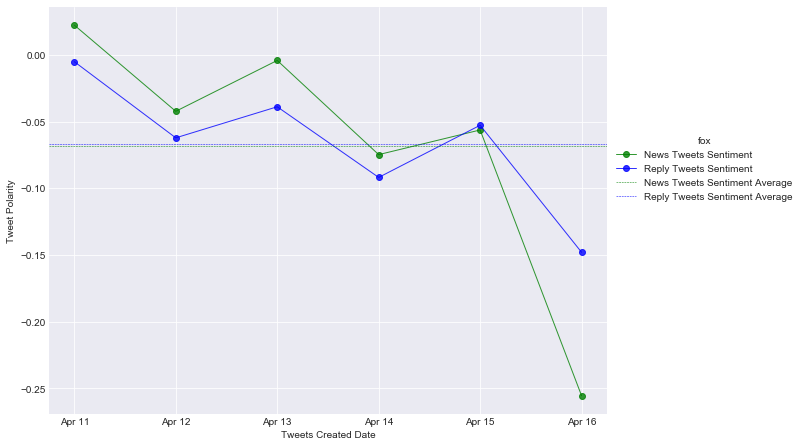

In [18]:
plt.figure(figsize=(10,7.5))
plt.style.use('seaborn-darkgrid')
x_val = fox_twitter_news_reply_sentiment_by_date["News Created Date Simplified"]
y_news = fox_twitter_news_reply_sentiment_by_date["Tweet News Compound"]
y_reply = fox_twitter_news_reply_sentiment_by_date["Tweet Reply Compound"]
plt.plot(x_val, y_news, marker="o", linewidth=1,
                 alpha=0.8, color="g", label='News Tweets Sentiment')
plt.plot(x_val, y_reply, marker="o", linewidth=1,
                 alpha=0.8, color="b", label='Reply Tweets Sentiment')
plt.axhline(y=fox_twitter_news_reply_sentiment_by_date['Tweet News Compound'].mean(), color='g', linestyle='dashed',linewidth=0.5,label='News Tweets Sentiment Average')
plt.axhline(y=fox_twitter_news_reply_sentiment_by_date['Tweet Reply Compound'].mean(), color='b', linestyle='dashed',linewidth=0.5,label='Reply Tweets Sentiment Average')
lgd = plt.legend(title="fox",loc='lower left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Created Date")
plt.savefig(f"Result/Fox_twitter_news_reply_sentiment_by_date.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [19]:
video_date = pd.DataFrame({"Video Title":pd.Series(fox_youtube['Video Title'].values, index=fox_youtube.index),
                          "Video Date":pd.Series(fox_youtube['Video Date'].values, index=fox_youtube.index)
                          })
video_date = video_date.drop_duplicates()

In [20]:
fox_youtube_news_reply_sentiment_by_date = fox_youtube_news_reply_sentiment.merge(video_date,on='Video Title',how='left')
fox_youtube_news_reply_sentiment_by_date.head()

,Video Title,Reply Compound,Reply Negative,Reply Neutral,Reply Positive,Title Compound,Title Positive,Title Neutral,Title Negative,Video Date
0,'Angel mom' reacts after Trump says DACA is dead,-0.227403,0.158350,0.745970,0.095680,-0.6486,0.000,0.650,0.350,2018-04-03
1,'Campus Craziness': Duke's safe space for toxi...,-0.184089,0.175833,0.714963,0.109185,0.4404,0.293,0.707,0.000,2016-10-04
2,'End of modern life' in Puerto Rico after Hurr...,-0.099360,0.112120,0.795090,0.082740,0.0000,0.000,1.000,0.000,2017-09-25
3,'Fox & Friends' town hall on gun control,-0.357245,0.190190,0.736100,0.073730,0.1779,0.295,0.476,0.229,2017-10-05
4,'Fox & Friends' town hall on guns and safety i...,-0.212598,0.138420,0.760710,0.100910,0.7096,0.424,0.576,0.000,2018-02-24


In [21]:
fox_youtube_title_compound = fox_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Title Compound'].mean()
fox_youtube_title_negative = fox_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Title Negative'].mean()
fox_youtube_title_neutral = fox_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Title Neutral'].mean()
fox_youtube_title_positive = fox_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Title Positive'].mean()
fox_youtube_reply_compound = fox_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Reply Compound'].mean()
fox_youtube_reply_negative = fox_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Reply Negative'].mean()
fox_youtube_reply_neutral = fox_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Reply Neutral'].mean()
fox_youtube_reply_positive = fox_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Reply Positive'].mean()
fox_youtube_sentiment_by_date = pd.DataFrame({
                                    "Youtube Title Compound": fox_youtube_title_compound,
                                    "Youtube Title Positive": fox_youtube_title_positive,
                                    "Youtube Title Neutral": fox_youtube_title_neutral,
                                    "Youtube Title Negative": fox_youtube_title_negative,
                                    "Youtube Reply Compound": fox_youtube_reply_compound,
                                    "Youtube Reply Positive": fox_youtube_reply_positive,
                                    "Youtube Reply Neutral": fox_youtube_reply_neutral,
                                    "Youtube Reply Negative": fox_youtube_reply_negative,
    
                                    })
fox_youtube_sentiment_by_date = fox_youtube_sentiment_by_date.reset_index()
fox_youtube_sentiment_by_date

,Video Date,Youtube Reply Compound,Youtube Reply Negative,Youtube Reply Neutral,Youtube Reply Positive,Youtube Title Compound,Youtube Title Negative,Youtube Title Neutral,Youtube Title Positive
0,2015-08-01,-0.145417,0.115667,0.836167,0.048167,0.000000,0.000000,1.000000,0.000000
1,2015-08-11,-0.180240,0.153000,0.624200,0.222800,-0.340000,0.231000,0.769000,0.000000
2,2015-08-22,-0.041880,0.081700,0.825600,0.092600,0.077200,0.000000,0.843000,0.157000
3,2015-08-25,0.087457,0.087360,0.740050,0.172610,0.025800,0.000000,0.891000,0.109000
4,2015-08-31,-0.166856,0.172333,0.708222,0.119667,0.000000,0.000000,1.000000,0.000000
5,2015-09-11,0.432900,0.000000,0.754000,0.246000,-0.476700,0.279000,0.721000,0.000000
6,2015-09-23,-0.264498,0.184120,0.731570,0.084300,-0.340000,0.286000,0.714000,0.000000
7,2015-10-01,-0.043628,0.166667,0.643833,0.189667,-0.624900,0.406000,0.594000,0.000000
8,2015-10-06,0.074129,0.146714,0.619286,0.234143,0.000000,0.000000,1.000000,0.000000
9,2015-10-27,-0.009901,0.148343,0.711444,0.140212,0.000000,0.000000,1.000000,0.000000


In [22]:
fox_youtube_sentiment_by_date.set_value(230,"Video Date","Apr 11")
fox_youtube_sentiment_by_date.set_value(231,"Video Date","Apr 12")
fox_youtube_sentiment_by_date.set_value(232,"Video Date","Apr 13")
fox_youtube_sentiment_by_date.set_value(233,"Video Date","Apr 14")
fox_youtube_sentiment_by_date.set_value(234,"Video Date","Apr 15")

/Users/jiemeizhang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
/Users/jiemeizhang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/jiemeizhang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jiemeizhang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] o

,Video Date,Youtube Reply Compound,Youtube Reply Negative,Youtube Reply Neutral,Youtube Reply Positive,Youtube Title Compound,Youtube Title Negative,Youtube Title Neutral,Youtube Title Positive
0,2015-08-01,-0.145417,0.115667,0.836167,0.048167,0.000000,0.000000,1.000000,0.000000
1,2015-08-11,-0.180240,0.153000,0.624200,0.222800,-0.340000,0.231000,0.769000,0.000000
2,2015-08-22,-0.041880,0.081700,0.825600,0.092600,0.077200,0.000000,0.843000,0.157000
3,2015-08-25,0.087457,0.087360,0.740050,0.172610,0.025800,0.000000,0.891000,0.109000
4,2015-08-31,-0.166856,0.172333,0.708222,0.119667,0.000000,0.000000,1.000000,0.000000
5,2015-09-11,0.432900,0.000000,0.754000,0.246000,-0.476700,0.279000,0.721000,0.000000
6,2015-09-23,-0.264498,0.184120,0.731570,0.084300,-0.340000,0.286000,0.714000,0.000000
7,2015-10-01,-0.043628,0.166667,0.643833,0.189667,-0.624900,0.406000,0.594000,0.000000
8,2015-10-06,0.074129,0.146714,0.619286,0.234143,0.000000,0.000000,1.000000,0.000000
9,2015-10-27,-0.009901,0.148343,0.711444,0.140212,0.000000,0.000000,1.000000,0.000000


In [23]:
fox_youtube_sentiment_by_date = fox_youtube_sentiment_by_date.set_index('Video Date')
fox_youtube_sentiment_by_date

,Youtube Reply Compound,Youtube Reply Negative,Youtube Reply Neutral,Youtube Reply Positive,Youtube Title Compound,Youtube Title Negative,Youtube Title Neutral,Youtube Title Positive
Video Date,,,,,,,,
2015-08-01,-0.145417,0.115667,0.836167,0.048167,0.000000,0.000000,1.000000,0.000000
2015-08-11,-0.180240,0.153000,0.624200,0.222800,-0.340000,0.231000,0.769000,0.000000
2015-08-22,-0.041880,0.081700,0.825600,0.092600,0.077200,0.000000,0.843000,0.157000
2015-08-25,0.087457,0.087360,0.740050,0.172610,0.025800,0.000000,0.891000,0.109000
2015-08-31,-0.166856,0.172333,0.708222,0.119667,0.000000,0.000000,1.000000,0.000000
2015-09-11,0.432900,0.000000,0.754000,0.246000,-0.476700,0.279000,0.721000,0.000000
2015-09-23,-0.264498,0.184120,0.731570,0.084300,-0.340000,0.286000,0.714000,0.000000
2015-10-01,-0.043628,0.166667,0.643833,0.189667,-0.624900,0.406000,0.594000,0.000000
2015-10-06,0.074129,0.146714,0.619286,0.234143,0.000000,0.000000,1.000000,0.000000


In [24]:
fox_twitter_news_reply_sentiment_by_date = fox_twitter_news_reply_sentiment_by_date.set_index('News Created Date Simplified')
fox_twitter_news_reply_sentiment_by_date

,Tweet News Compound,Tweet News Negative,Tweet News Neutral,Tweet News Positive,Tweet Reply Compound,Tweet Reply Negative,Tweet Reply Neutral,Tweet Reply Positive
News Created Date Simplified,,,,,,,,
Apr 11,0.022360,0.077343,0.842793,0.079852,-0.005033,0.093958,0.813813,0.092239
Apr 12,-0.042224,0.094159,0.833769,0.072068,-0.062124,0.109259,0.800604,0.090140
Apr 13,-0.004102,0.082966,0.835871,0.081191,-0.038830,0.098043,0.809866,0.092100
Apr 14,-0.074705,0.106435,0.818636,0.074900,-0.091780,0.114267,0.801359,0.084371
Apr 15,-0.056221,0.096448,0.830280,0.073233,-0.052698,0.101653,0.806181,0.092159
Apr 16,-0.255467,0.148000,0.763667,0.088333,-0.147925,0.119617,0.828962,0.051404


In [25]:
youtube_tweet_news_reply_sentiment = fox_twitter_news_reply_sentiment_by_date.merge(fox_youtube_sentiment_by_date,left_index=True,right_index=True,how='inner')
youtube_tweet_news_reply_sentiment.reset_index(inplace=True)
youtube_tweet_news_reply_sentiment = youtube_tweet_news_reply_sentiment.rename(columns={"index": "News Created Date"})
youtube_tweet_news_reply_sentiment

,News Created Date,Tweet News Compound,Tweet News Negative,Tweet News Neutral,Tweet News Positive,Tweet Reply Compound,Tweet Reply Negative,Tweet Reply Neutral,Tweet Reply Positive,Youtube Reply Compound,Youtube Reply Negative,Youtube Reply Neutral,Youtube Reply Positive,Youtube Title Compound,Youtube Title Negative,Youtube Title Neutral,Youtube Title Positive
0,Apr 11,0.022360,0.077343,0.842793,0.079852,-0.005033,0.093958,0.813813,0.092239,-0.174267,0.166840,0.727859,0.103130,-0.070495,0.113714,0.827810,0.058476
1,Apr 12,-0.042224,0.094159,0.833769,0.072068,-0.062124,0.109259,0.800604,0.090140,-0.130040,0.158498,0.729235,0.110848,-0.016411,0.139444,0.726778,0.133778
2,Apr 13,-0.004102,0.082966,0.835871,0.081191,-0.038830,0.098043,0.809866,0.092100,-0.155344,0.161771,0.732123,0.106106,-0.017065,0.084231,0.847308,0.068462
3,Apr 14,-0.074705,0.106435,0.818636,0.074900,-0.091780,0.114267,0.801359,0.084371,-0.236426,0.193279,0.709225,0.096859,-0.099166,0.188138,0.719000,0.092828
4,Apr 15,-0.056221,0.096448,0.830280,0.073233,-0.052698,0.101653,0.806181,0.092159,-0.118738,0.152704,0.725572,0.119468,-0.014467,0.194333,0.668000,0.137667


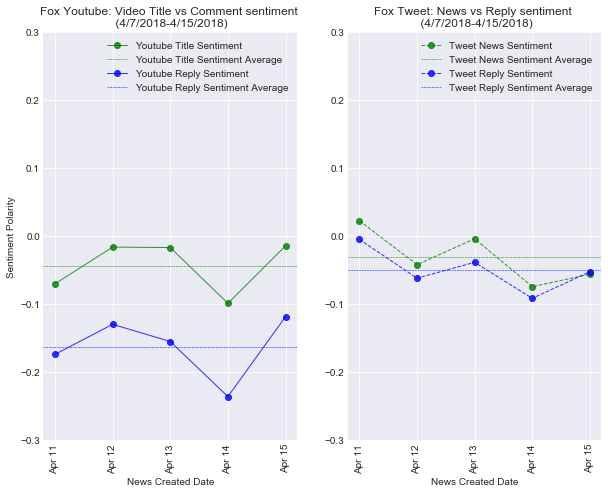

In [27]:
plt.figure(figsize=(10,7.5))
plt.style.use('seaborn-darkgrid')
#plt.title("Fox Youtube vs Twitter: News vs reply sentiment (4/7/2018-4/15/2018)")

x_val = youtube_tweet_news_reply_sentiment["News Created Date"]
y_news_tweet = youtube_tweet_news_reply_sentiment["Tweet News Compound"]
y_reply_tweet = youtube_tweet_news_reply_sentiment["Tweet Reply Compound"]
y_news_youtube = youtube_tweet_news_reply_sentiment["Youtube Title Compound"]
y_reply_youtube = youtube_tweet_news_reply_sentiment["Youtube Reply Compound"]

ax1 = plt.subplot(121)
plt.plot(x_val, y_news_youtube, marker="o", linewidth=1,
                 alpha=0.8, color="g", label='Youtube Title Sentiment')
plt.axhline(y=youtube_tweet_news_reply_sentiment['Youtube Title Compound'].mean(), color='g', linestyle='dashed',linewidth=0.5,label='Youtube Title Sentiment Average')
plt.plot(x_val, y_reply_youtube, marker="o", linewidth=1,
                 alpha=0.8, color="b", label='Youtube Reply Sentiment')
plt.axhline(y=youtube_tweet_news_reply_sentiment['Youtube Reply Compound'].mean(), color='b', linestyle='dashed',linewidth=0.5,label='Youtube Reply Sentiment Average')
plt.ylim(-0.3, 0.3)
plt.legend(loc='best')
plt.ylabel("Sentiment Polarity")
plt.xlabel("News Created Date")
plt.xticks(rotation='vertical')
ax1.set_title("Fox Youtube: Video Title vs Comment sentiment \n (4/7/2018-4/15/2018)")

ax2 = plt.subplot(122)
plt.plot(x_val, y_news_tweet, marker="o", linewidth=1,linestyle='dashed',
                 alpha=0.8, color="g", label='Tweet News Sentiment')
plt.axhline(y=youtube_tweet_news_reply_sentiment['Tweet News Compound'].mean(), color='g', linestyle='dashed',linewidth=0.5,label='Tweet News Sentiment Average')
plt.plot(x_val, y_reply_tweet, marker="o", linewidth=1,linestyle='dashed',
                 alpha=0.8, color="b", label='Tweet Reply Sentiment')
plt.axhline(y=youtube_tweet_news_reply_sentiment['Tweet Reply Compound'].mean(), color='b', linestyle='dashed',linewidth=0.5,label='Tweet Reply Sentiment Average')
plt.ylim(-0.3, 0.3)
plt.legend(loc='best')
plt.xlabel("News Created Date")
plt.xticks(rotation='vertical')
ax2.set_title("Fox Tweet: News vs Reply sentiment \n (4/7/2018-4/15/2018)")

plt.savefig(f"Result/Fox_youtube_tweet_news_reply_sentiment_by_date.png")
plt.show()

